# LeetCode

## Link

1. https://leetcode.com/

2. https://leetcode-cn.com/

## Demo

1. https://www.onlinegdb.com/

## Details

LeetCode: 56, 148, 274

# LeetCode 5. Longest Palindromic Substring 最长回文子串

Given a string s, return the longest palindromic substring in s.

给你一个字符串 s，找到 s 中最长的回文子串。

Example 1:

```
Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.
```

解释："aba" 同样是符合题意的答案。

Example 2:

```
Input: s = "cbbd"
Output: "bb"
```

Constraints:

- 1 <= s.length <= 1000

- s consist of only digits and English letters.

s 仅由数字和英文字母组成


## 解题思路


解法一，动态规划。定义 dp[i][j] 表示从字符串第 i 个字符到第 j 个字符这一段子串是否是回文串。由回文串的性质可以得知，回文串去掉一头一尾相同的字符以后，剩下的还是回文串。所以状态转移方程是 dp[i][j] = (s[i] == s[j]) && ((j-i < 3) || dp[i+1][j-1])，注意特殊的情况，j - i == 1 的时候，即只有 2 个字符的情况，只需要判断这 2 个字符是否相同即可。j - i == 2 的时候，即只有 3 个字符的情况，只需要判断除去中心以外对称的 2 个字符是否相等。每次循环动态维护保存最长回文串即可。时间复杂度 O(n^2)，空间复杂度 O(n^2)。

解法二，中心扩散法。动态规划的方法中，我们将任意起始，终止范围内的字符串都判断了一遍。其实没有这个必要，如果不是最长回文串，无需判断并保存结果。所以动态规划的方法在空间复杂度上还有优化空间。判断回文有一个核心问题是找到“轴心”。如果长度是偶数，那么轴心是中心虚拟的，如果长度是奇数，那么轴心正好是正中心的那个字母。中心扩散法的思想是枚举每个轴心的位置。然后做两次假设，假设最长回文串是偶数，那么以虚拟中心往 2 边扩散；假设最长回文串是奇数，那么以正中心的字符往 2 边扩散。扩散的过程就是对称判断两边字符是否相等的过程。这个方法时间复杂度和动态规划是一样的，但是空间复杂度降低了。时间复杂度 O(n^2)，空间复杂度 O(1)。

解法三，滑动窗口。这个写法其实就是中心扩散法变了一个写法。中心扩散是依次枚举每一个轴心。滑动窗口的方法稍微优化了一点，有些轴心两边字符不相等，下次就不会枚举这些不可能形成回文子串的轴心了。不过这点优化并没有优化时间复杂度，时间复杂度 O(n^2)，空间复杂度 O(1)。

解法四，马拉车算法。这个算法是本题的最优解，也是最复杂的解法。时间复杂度 O(n)，空间复杂度 O(n)。中心扩散法有 2 处有重复判断，第一处是每次都往两边扩散，不同中心扩散多次，实际上有很多重复判断的字符，能否不重复判断？第二处，中心能否跳跃选择，不是每次都枚举，是否可以利用前一次的信息，跳跃选择下一次的中心？马拉车算法针对重复判断的问题做了优化，增加了一个辅助数组，将时间复杂度从 O(n^2) 优化到了 O(n)，空间换了时间，空间复杂度增加到 O(n)。

https://books.halfrost.com/leetcode/ChapterFour/0001~0099/0005.Longest-Palindromic-Substring/


In [1]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        if s == s[::-1]:
            return s
        max_len = 1
        ans = s[0]
        for i in range(1, len(s)):
            if i - max_len - 1 >= 0 and s[i - max_len - 1: i + 1] == s[i - max_len - 1: i + 1][::-1]:
                ans = s[i - max_len - 1: i + 1]
                max_len += 2
            if i - max_len >= 0 and s[i - max_len: i + 1] == s[i - max_len: i + 1][::-1]:
                ans = s[i - max_len: i + 1]
                max_len += 1
        return ans

# LeetCode 64. Minimum Path Sum 最小路径和

Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right, which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.


给定一个包含非负整数的 m x n 网格 grid ，请找出一条从左上角到右下角的路径，使得路径上的数字总和为最小。

说明：每次只能向下或者向右移动一步。

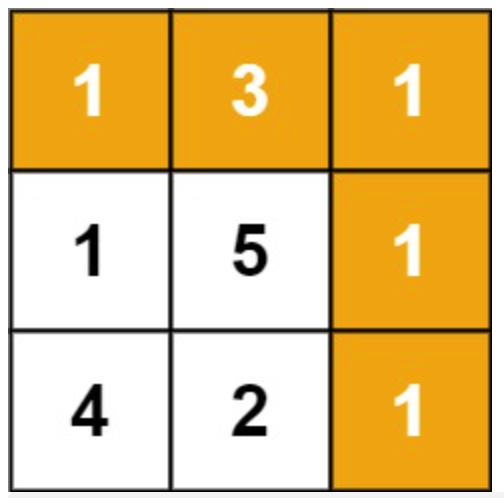

Example 1:

```
Input: grid = [[1,3,1],[1,5,1],[4,2,1]]
Output: 7
Explanation: Because the path 1 → 3 → 1 → 1 → 1 minimizes the sum.
```

因为路径 1→3→1→1→1 的总和最小。

Example 2:

```
Input: grid = [[1,2,3],[4,5,6]]
Output: 12
```

Constraints:

- m == grid.length

- n == grid[i].length

- 1 <= m, n <= 200

- 0 <= grid[i][j] <= 100


## 解题思路

- 给定一个包含非负整数的 m x n 网格，请找出一条从左上角到右下角的路径，使得路径上的数字总和为最小。说明：每次只能向下或者向右移动一步。

- 在地图上求出从左上角到右下角的路径中，数字之和最小的一个，输出数字和。

- 这一题最简单的想法就是用一个二维数组来 DP，当然这是最原始的做法。由于只能往下和往右走，只需要维护 2 列信息就可以了，从左边推到最右边即可得到最小的解。

In [2]:
class Solution(object):
    def minPathSum(self, grid):
        #此数组用于记忆化搜索
        dp = [[0]*len(grid[0]) for i in range(len(grid))]
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                #在起点的时候
                if (i == 0 and j == 0):
                    dp[i][j] = grid[0][0]
                #在左边缘的时候
                elif (j == 0 and i != 0):
                    dp[i][j] = dp[i - 1][j]  + grid[i][j]
                #在上边缘的时候
                elif (i == 0 and j != 0):
                    dp[i][j] = dp[i][j-1] + grid[i][j]
                # 普遍情况下
                else:
                    dp[i][j] = min(dp[i - 1][j], dp[i][j - 1]) + grid[i][j]                    
        return dp[len(grid)-1][len(grid[0])-1]

# LeetCode 120. Triangle, 三角形最小路径和

Given a triangle array, return the minimum path sum from top to bottom.

For each step, you may move to an adjacent number of the row below. More formally, if you are on index i on the current row, you may move to either index i or index i + 1 on the next row.

给定一个三角形 triangle ，找出自顶向下的最小路径和。

每一步只能移动到下一行中相邻的结点上。相邻的结点 在这里指的是 下标 与 上一层结点下标 相同或者等于 上一层结点下标 + 1 的两个结点。也就是说，如果正位于当前行的下标 i ，那么下一步可以移动到下一行的下标 i 或 i + 1 。


Example 1:

```
Input: triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]
Output: 11
Explanation: The triangle looks like:
   2
  3 4
 6 5 7
4 1 8 3
The minimum path sum from top to bottom is 2 + 3 + 5 + 1 = 11 (underlined above).
```

自顶向下的最小路径和为 11（即，2 + 3 + 5 + 1 = 11）。

Example 2:

```
Input: triangle = [[-10]]
Output: -10
```

Constraints:

- 1 <= triangle.length <= 200

- triangle[0].length == 1

- triangle[i].length == triangle[i - 1].length + 1

- $-10^{4} <= triangle[i][j] <= 10^{4}$

Follow up: Could you do this using only O(n) extra space, where n is the total number of rows in the triangle?

你可以只使用 O(n) 的额外空间（n 为三角形的总行数）来解决这个问题吗？


## 解题思路

- 求出从三角形顶端到底端的最小和。要求最好用 O(n) 的时间复杂度。

- 这一题最优解是不用辅助空间，直接从下层往上层推。普通解法是用二维数组 DP，稍微优化的解法是一维数组 DP。

In [3]:
from typing import List
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        depth = len(triangle)
        for i in range(-2, -depth-1, -1):
            for j in range(depth + 1 + i):
                triangle[i][j] += min(triangle[i+1][j], triangle[i+1][j+1])
        return triangle[0][0]